In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# load the dataset
df = pd.read_csv('clean_smartphones.csv')

## Understanding the Data :

In [26]:
df.head()

,brand,processor_name,processor_cores,processor_speed,os,ram,storage,battery_capacity,battery_power,DualSim,...,wifi,ngc,irblaster,display_size,display_resolution,rear_camera,front_camera,memory_card_supported,rating,price
0,OnePlus,Snapdragon,8.0,3.2,Android v13,12 GB RAM,256 GB inbuilt,5000 mAh,100W,1,...,1,1,0,6.70,1440x3216,50.0,16.0,0.0,89.0,54999
1,OnePlus,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,33W,1,...,1,0,0,6.59,1080x2412,64.0,16.0,1.0,81.0,19989
2,Samsung,Exynos,8.0,2.4,Android v13,4 GB RAM,64 GB inbuilt,5000 mAh,15W,1,...,1,0,0,6.60,1080x2408,50.0,13.0,1.0,75.0,16499
3,Motorola,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,NaN,1,...,1,0,0,6.55,1080x2400,50.0,16.0,1.0,81.0,14999
4,Realme,Dimensity,8.0,2.6,Android v13,6 GB RAM,128 GB inbuilt,5000 mAh,67W,1,...,1,0,0,6.70,1080x2412,108.0,16.0,0.0,82.0,24999


In [27]:
df.shape

(1020, 23)

In [28]:
# missing values
df.isnull().sum()

brand                      0
processor_name            53
processor_cores           40
processor_speed           89
os                       279
ram                       27
storage                   27
battery_capacity          33
battery_power            251
DualSim                    0
Volte                      0
is_5G                      0
is_Vo5G                    0
wifi                       0
ngc                        0
irblaster                  0
display_size              33
display_resolution        33
rear_camera               66
front_camera              77
memory_card_supported    279
rating                   141
price                      0
dtype: int64

In [29]:
df.duplicated().sum()

2

In [30]:
df = df.drop_duplicates().reset_index(drop=True)

In [31]:
df.head()

,brand,processor_name,processor_cores,processor_speed,os,ram,storage,battery_capacity,battery_power,DualSim,...,wifi,ngc,irblaster,display_size,display_resolution,rear_camera,front_camera,memory_card_supported,rating,price
0,OnePlus,Snapdragon,8.0,3.2,Android v13,12 GB RAM,256 GB inbuilt,5000 mAh,100W,1,...,1,1,0,6.70,1440x3216,50.0,16.0,0.0,89.0,54999
1,OnePlus,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,33W,1,...,1,0,0,6.59,1080x2412,64.0,16.0,1.0,81.0,19989
2,Samsung,Exynos,8.0,2.4,Android v13,4 GB RAM,64 GB inbuilt,5000 mAh,15W,1,...,1,0,0,6.60,1080x2408,50.0,13.0,1.0,75.0,16499
3,Motorola,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,NaN,1,...,1,0,0,6.55,1080x2400,50.0,16.0,1.0,81.0,14999
4,Realme,Dimensity,8.0,2.6,Android v13,6 GB RAM,128 GB inbuilt,5000 mAh,67W,1,...,1,0,0,6.70,1080x2412,108.0,16.0,0.0,82.0,24999


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  1018 non-null   object 
 1   processor_name         965 non-null    object 
 2   processor_cores        978 non-null    float64
 3   processor_speed        929 non-null    object 
 4   os                     740 non-null    object 
 5   ram                    991 non-null    object 
 6   storage                991 non-null    object 
 7   battery_capacity       985 non-null    object 
 8   battery_power          767 non-null    object 
 9   DualSim                1018 non-null   int64  
 10  Volte                  1018 non-null   int64  
 11  is_5G                  1018 non-null   int64  
 12  is_Vo5G                1018 non-null   int64  
 13  wifi                   1018 non-null   int64  
 14  ngc                    1018 non-null   int64  
 15  irbl

## Exploratory Data Analysis :

### 1. Brand :

[(137, 'Xiaomi'), (135, 'Samsung'), (111, 'Vivo'), (97, 'Realme'), (87, 'OPPO'), (53, 'Motorola'), (47, 'Apple'), (42, 'OnePlus'), (41, 'POCO'), (33, 'Tecno'), (32, 'iQOO'), (30, 'Nokia'), (29, 'Infinix'), (16, 'Huawei'), (14, 'Google')]


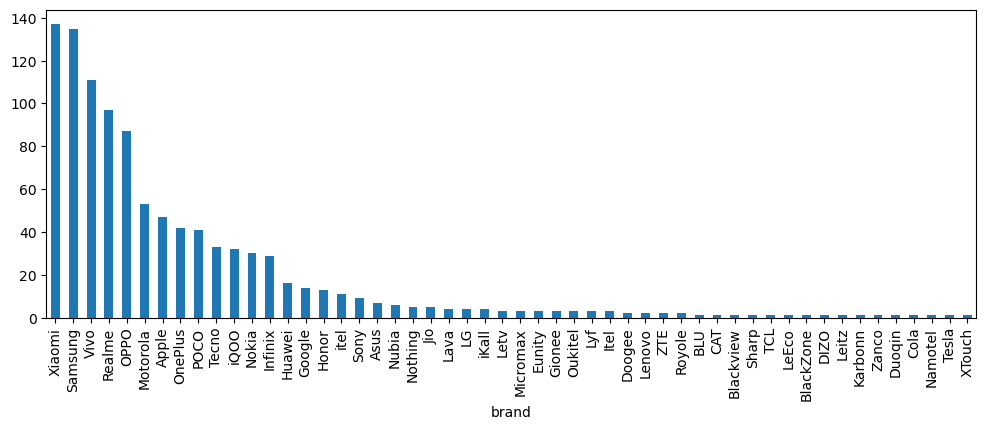

In [50]:
plt.figure(figsize=(12,4))
print([(df['brand'].value_counts().values[i],df['brand'].value_counts().index[i]) for i in range(15)])
df['brand'].value_counts().plot(kind='bar')
plt.show()

#### Price and Brand --

In [45]:
# vertu is clearly a outlier
df.drop([430],axis=0,inplace=True)

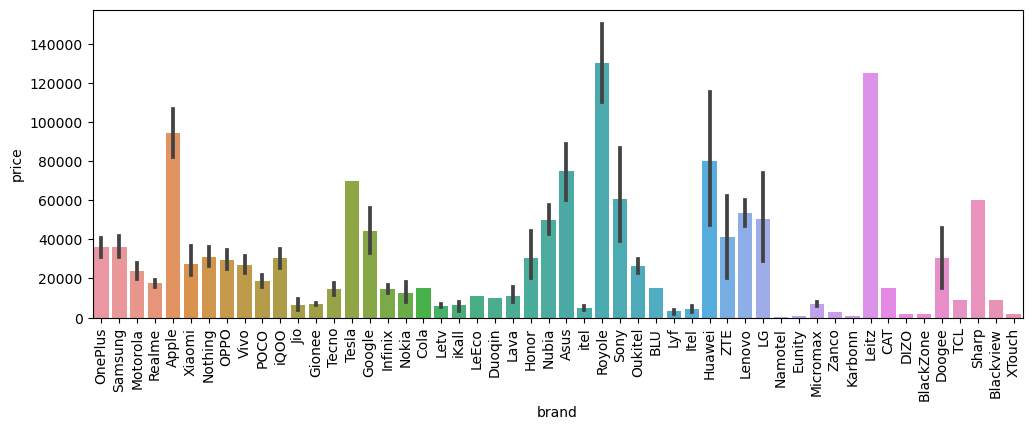

In [46]:
plt.figure(figsize=(12,4))
sns.barplot(x=df['brand'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

### 2. Processor :

[(416, 'Snapdragon'), (202, 'Helio'), (175, 'Dimensity'), (50, 'Exynos'), (45, 'Bionic'), (35, 'Unisoc'), (24, 'Tiger'), (9, 'Google'), (7, 'Kirin'), (1, 'Fusion')]


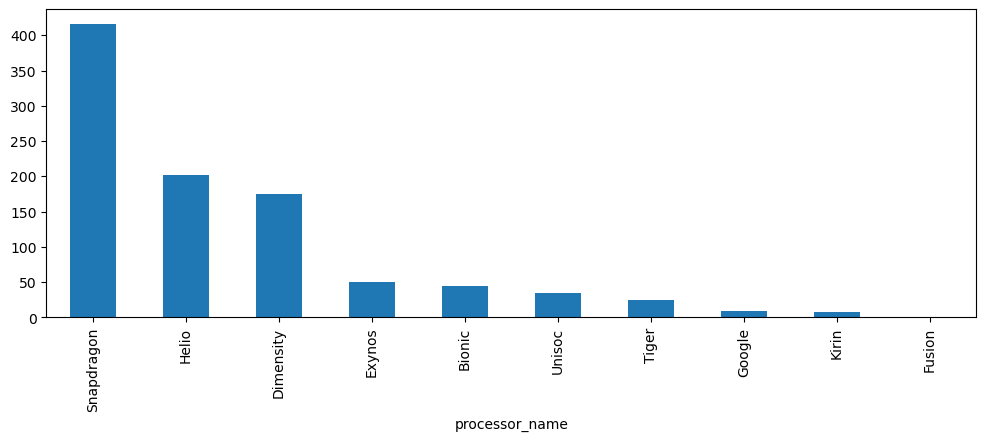

In [55]:
# processor name
plt.figure(figsize=(12,4))
print([(df['processor_name'].value_counts().values[i],df['processor_name'].value_counts().index[i]) for i in range(10)])
df['processor_name'].value_counts().plot(kind='bar')
plt.show()

[(896, 8.0), (39, 6.0), (39, 4.0), (2, 2.0), (1, 1.0)]


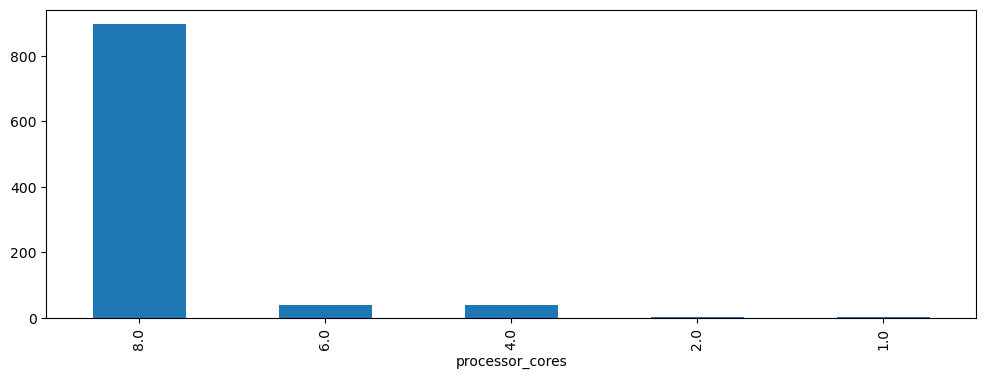

In [58]:
# processor cores
plt.figure(figsize=(12,4))
print([(df['processor_cores'].value_counts().values[i],df['processor_cores'].value_counts().index[i]) for i in range(5)])
df['processor_cores'].value_counts().plot(kind='bar')
plt.show()

[(143, ' 2'), (133, ' 2.2'), (128, ' 2.4'), (94, ' 3.2'), (86, ' 2.3'), (53, ' 3'), (36, ' 2.84'), (28, ' 2.05'), (23, ' 2.5'), (22, ' 1.8'), (18, ' 3.22'), (18, ' 2.85'), (18, ' 1.6'), (15, ' 3.1'), (14, ' 2.6'), (13, ' 2.9'), (10, ' 1.82'), (9, ' 2.73'), (9, ' 2.8'), (8, ' 1.3'), (8, ' 3.05'), (8, ' 2.36'), (5, ' 2.65'), (5, ' 2.7'), (4, ' 1.4'), (3, ' 1.1'), (3, ' 2.96'), (3, ' 1.5'), (3, ' 2.86'), (2, ' 3.13'), (1, ' 2.35'), (1, ' 2.37'), (1, ' 1.99'), (1, ' 1.95'), (1, ' 2.1'), (1, ' 1.2')]


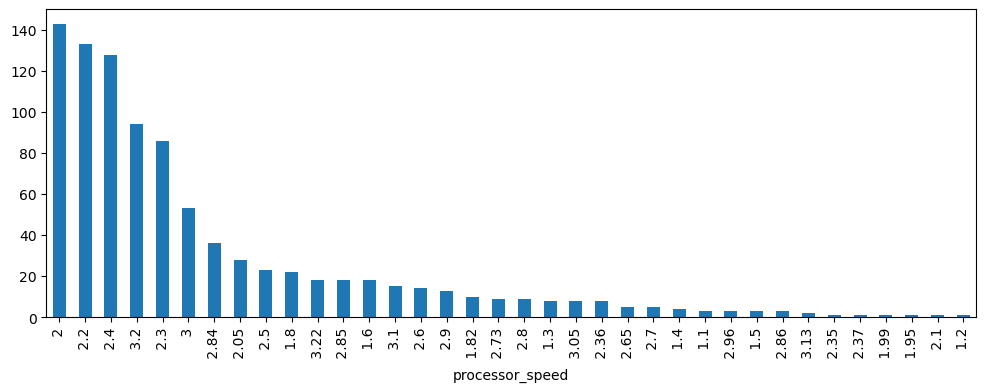

In [65]:
# df['processor_speed'] = df['processor_speed'].str.replace('\u2009','')

# processor speed
plt.figure(figsize=(12,4))
sns.scatterplot(x=df['processor_speed'])
plt.show()